In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

import wrangle as w
import explore as e
import env
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = w.wrangle_zillow()

In [3]:
df.head(3)

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips
0,4,3.5,3100,1023282,1998,11013.72,6059
1,2,1.0,1465,464000,1967,5672.48,6111
2,3,2.0,1243,564778,1962,6488.30,6059


In [4]:
train, validate, test = w.split_data(df)

In [5]:
train.head(3)

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips
8096,3,2.0,1605,206483,1983,2293.70,6111
45007,2,1.0,1521,110048,1970,1530.47,6037
43774,3,2.0,1678,82423,1956,1175.02,6059


In [6]:
x_train = train[['bedrooms', 'bathrooms', 'sq_feet']]
y_train = train[['tax_value']]

x_validate = validate[['bedrooms', 'bathrooms', 'sq_feet']]
y_validate = validate[['tax_value']]

x_test = test[['bedrooms', 'bathrooms', 'sq_feet']]
y_test = test[['tax_value']]

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28442 entries, 8096 to 45413
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   28442 non-null  int64  
 1   bathrooms  28442 non-null  float64
 2   sq_feet    28442 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 888.8 KB


In [8]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28442 entries, 8096 to 45413
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tax_value  28442 non-null  int64
dtypes: int64(1)
memory usage: 444.4 KB


# Stat analysis

In [9]:
corr, p = stats.pearsonr(x_train['bedrooms'], y_train)
print(f'corr = {float(corr):.4f}')
print(f'p    = {p:.4f}')

corr = 0.2747
p    = 0.0000


In [10]:
corr

array([0.2746855350581237], dtype=object)

In [11]:
corr2, p2 = stats.pearsonr(x_train['bathrooms'], y_train)
print(f'corr = {float(corr2):.4f}')
print(f'p    = {p2:.4f}')

corr = 0.5052
p    = 0.0000


In [12]:
corr3, p3 = stats.pearsonr(x_train['sq_feet'], y_train)
print(f'corr = {float(corr3):.4f}')
print(f'p    = {p3:.4f}')

corr = 0.5762
p    = 0.0000


In [13]:
#plt.hist(train['bedrooms'])

Text(0.5, 1.0, 'Bedrooms VS Tax Value')

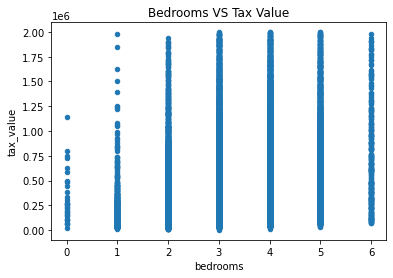

In [14]:
train.plot.scatter('bedrooms','tax_value')
plt.title('Bedrooms VS Tax Value')

In [15]:
#sns.swarmplot(x='bedrooms', y='tax_value', data=train)

Text(0.5, 1.0, 'Bathrooms VS Tax Value')

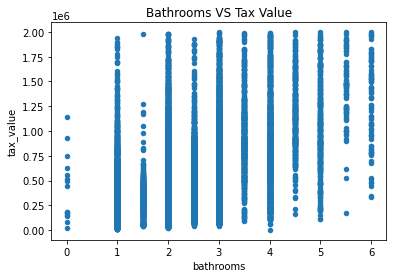

In [16]:
train.plot.scatter('bathrooms','tax_value')
plt.title('Bathrooms VS Tax Value')

Text(0.5, 1.0, 'Square Feet VS Tax Value')

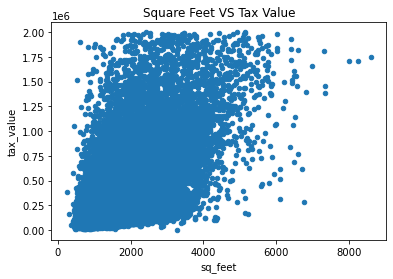

In [17]:
train.plot.scatter('sq_feet','tax_value')
plt.title('Square Feet VS Tax Value')

<AxesSubplot:xlabel='bedrooms', ylabel='tax_value'>

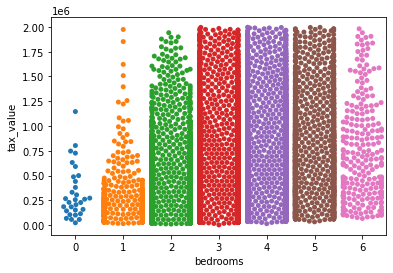

In [18]:
sns.swarmplot(x='bedrooms', y='tax_value', data=train)

In [28]:
train_viz = train.sample(frac=0.10, replace=True, random_state=777)

In [29]:
train_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844 entries, 29363 to 47678
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    2844 non-null   int64  
 1   bathrooms   2844 non-null   float64
 2   sq_feet     2844 non-null   int64  
 3   tax_value   2844 non-null   int64  
 4   year_built  2844 non-null   int64  
 5   tax_amount  2844 non-null   float64
 6   fips        2844 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 177.8 KB


<AxesSubplot:xlabel='bedrooms', ylabel='tax_value'>

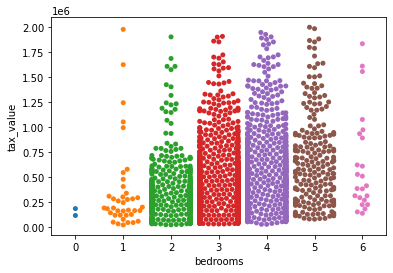

In [35]:
sns.swarmplot(x='bedrooms', y='tax_value', data=train_viz, size=5)

<AxesSubplot:xlabel='bedrooms', ylabel='tax_value'>

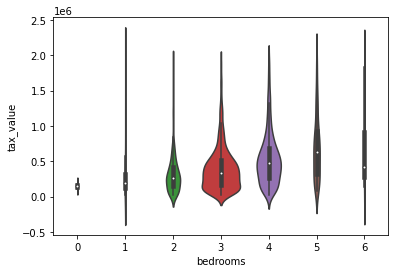

In [39]:
sns.violinplot(x='bedrooms', y='tax_value', data=train_viz, scale='count', scale_hue=False)